# Практическая работа: Анализ глобальных статистических показателей

## Описание задач

В данной практической работе проведён анализ различных глобальных статистических показателей на основе набора данных, включающего показатели IQ, количество Нобелевских премий и численность населения по странам. Основные задачи работы включают:

1. **Связь между нобелевскими премиями и интеллектом**  
   Исследуется взаимосвязь между средним IQ населения страны и количеством полученных Нобелевских премий. График, построенный по данным, позволяет оценить, существует ли корреляция между этими показателями и насколько сильна данная связь.

2. **Средний IQ по континентам**  
   Для оценки географических различий был рассчитан средний IQ по континентам. Результаты представлены в виде столбчатой диаграммы, где континенты отсортированы от наивысшего к наименьшему среднему значению IQ. Это позволяет выявить, какие регионы демонстрируют наиболее высокие показатели.

3. **Сравнение распределения населения по странам на линейной и логарифмической шкалах**  
   Анализ распределения численности населения стран выполнен с использованием двух разных подходов: с линейной и логарифмической шкалами. Такой сравнительный анализ позволяет лучше понять характер распределения, выявить «длинный хвост» (крайне высокие значения) и оценить, насколько логарифмическая шкала помогает визуализировать данные более информативно.

Загрузка и обработка данных:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "IQ_countries.csv"

# reading file as normal text for correct research rows
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# table's header
headers = lines[0].strip().split(',')

# fnc for format row


def process_row(row):
    values = row.strip().split(',')  # split lines on commas
    values = [v.strip('"') for v in values]  # remove quotes at the beginning and at the end

    # if row is crashed, then return list of 10 elements include empty rows
    while len(values) < len(headers):
        values.append('0')

    return values


# reading all rows and check their
cleaned_data = [process_row(line) for line in lines[1:]]

# created DataFrame from format rows
df = pd.DataFrame(cleaned_data, columns=headers)

# replace empty rows and crashed data on "0"
df.replace([' ', ''], '0', inplace=True)

# I format the data columns into the appropriate data type
df['Rank'] = df['Rank'].astype(int)

#  Заметил что столбец "Population" не валидный. Нужно убрать разделители и буквы
df['Population'] = df['Population'].astype(str)  # Приводим к строке на всякий случай
df['Population'] = df['Population'].str.replace(r'\D', '', regex=True)  # удаляем все кроме цифр
df['Population'] = df['Population'].astype(int)  # приводим к int

print('Проверяю тип данных в Gross National Income:')
print(df['Gross National Income'].apply(type).value_counts())
df['Gross National Income'] = pd.to_numeric(df['Gross National Income'], errors='coerce')
df['Gross National Income'] = df['Gross National Income'].astype('Int64')

# save result
df.to_csv("IQ_countries_clean.csv", index=False)

# load data
data = pd.read_csv("IQ_countries_clean.csv")

Проверяю тип данных в Gross National Income:
Gross National Income
<class 'str'>    193
Name: count, dtype: int64


## 1. Связь между нобелевскими премиями и интеллектом

График отображает взаимосвязь между средним IQ населения страны и количеством Нобелевских премий, полученных представителями этой страны.  

**Что здесь происходит?**  
Каждая точка на графике представляет собой страну. По оси X отложен средний IQ населения страны, а по оси Y — количество полученных Нобелевских премий. Видно, что большинство точек сосредоточены в области IQ от 80 до 100 и при этом имеют небольшое количество Нобелевских премий. Однако есть несколько выбросов — страны с высоким количеством премий при относительно высоком среднем IQ. Например, одна из таких точек (~400 премий) явно относится к США.  

**Вывод:**  
На графике можно заметить слабую тенденцию: страны с более высоким средним IQ имеют больше Нобелевских премий. Однако распределение довольно неравномерное, и в большинстве случаев количество премий остаётся низким, вне зависимости от IQ. Это говорит о том, что получение Нобелевских премий зависит не только от среднего интеллекта населения, но и от множества других факторов, таких как научные традиции, финансирование исследований и политическая среда.

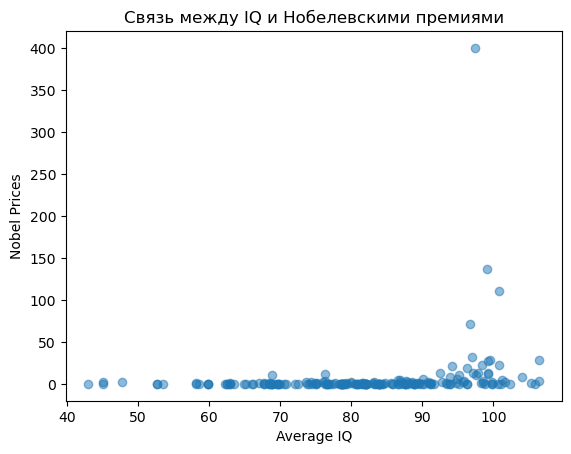

In [21]:
# Данные корректны, начинаю построение графиков
# 1. Связь между нобелевскими премиями и интеллектом
plt.scatter(data['Average IQ'], data['Nobel Prices'], alpha=0.5)
plt.xlabel('Average IQ')
plt.ylabel('Nobel Prices')
plt.title('Связь между IQ и Нобелевскими премиями')
plt.show()

## 2. Средний IQ по Континентам

**Пояснение:**
- Данные сгруппированы по континентам, после чего вычислено среднее значение IQ для каждого континента.
- Далее значения отсортированы по убыванию, что позволяет легко увидеть, какие регионы лидируют, а какие отстают.
- Столбцы окрашены в синий цвет для наглядности, добавлены границы и вспомогательные линии для улучшенного восприятия.

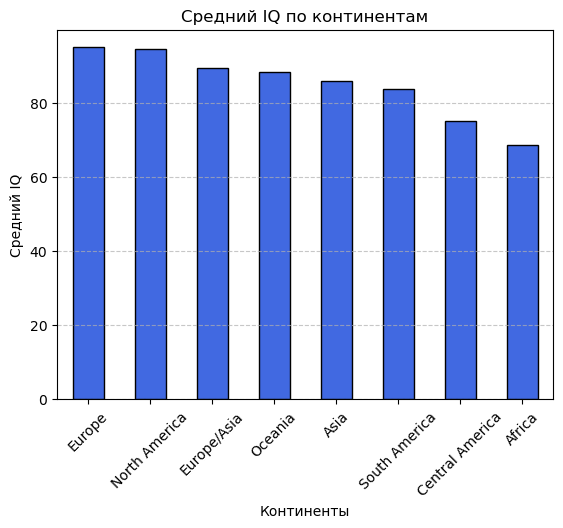

In [51]:
# Группируем данные по континентам, вычисляем средний IQ и сортируем от большего к меньшему
iq_by_continent = data.groupby('Continent')['Average IQ'].mean().sort_values(ascending=False)

# Построение столбчатой диаграммы
iq_by_continent.plot(kind='bar', color='royalblue', edgecolor='black')
plt.ylabel('Средний IQ')
plt.xlabel('Континенты')
plt.title('Средний IQ по континентам')
plt.xticks(rotation=45)  # Наклон подписей для удобства чтения
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем горизонтальные линии для наглядности
plt.show()

**Вывод:**
1. Наиболее высокий средний уровень IQ наблюдается в определённых регионах (ожидаемо, Азия, Европа).
2. Разница между континентами может объясняться различными факторами, включая систему образования, уровень жизни и другие социально-экономические параметры.
3. Такой анализ позволяет выявить глобальные тенденции и потенциальные причины различий.

## 3. Сравнение распределения населения по странам на линейной и логарифмической шкалах

В этой задаче мы визуализируем распределение численности населения двух способами:
1. **Обычная (линейная) шкала**  
2. **Логарифмическая шкала**  

Это помогает понять, как влияют экстремально большие значения (например, население Китая и Индии) на восприятие данных.

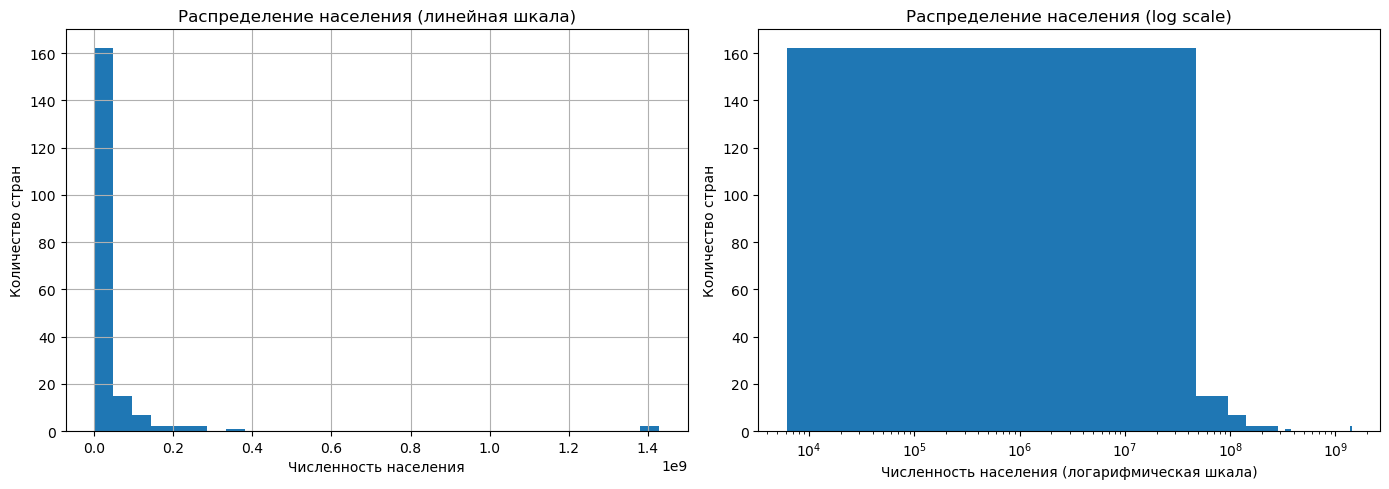

In [35]:
# 1. Линейная шкала
plt.figure(figsize=(14, 5))  # Создаем фигуру побольше, чтобы вместить два графика

plt.subplot(1, 2, 1)  # Первый график (слева)
data['Population'].hist(bins=30)
plt.xlabel('Численность населения')
plt.ylabel('Количество стран')
plt.title('Распределение населения (линейная шкала)')

# 2. Логарифмическая шкала
plt.subplot(1, 2, 2)  # Второй график (справа)
plt.hist(data['Population'], bins=30)
plt.xscale('log')
plt.xlabel('Численность населения (логарифмическая шкала)')
plt.ylabel('Количество стран')
plt.title('Распределение населения (log scale)')

plt.tight_layout()
plt.show()

### Пояснение

- **Левый график** (линейная шкала) показывает, что большинство стран имеют относительно небольшое население (до 200 млн), а несколько стран с очень большим населением создают «длинный хвост» распределения.

- **Правый график** (логарифмическая шкала) сглаживает этот «хвост», позволяя лучше разглядеть различия между странами, особенно в среднем диапазоне.

### Выводы
- На линейной шкале распределение выглядит крайне неравномерным: большинство стран находится в левой части, а единичные гиганты сильно смещают масштаб.
- Применение логарифмической шкалы даёт более детальную картину: мы видим, что страны распределены более равномерно, а различия в порядке миллионов и миллиардов населения сглаживаются.
- Оба подхода корректны и отражают одну и ту же реальность, но логарифмическая шкала часто предпочтительнее, когда разброс данных очень велик.

---

## Заключение

Проведённый анализ позволяет получить ценные инсайты о глобальных тенденциях:
- Выявлена слабая, но заметная корреляция между IQ и количеством Нобелевских премий, что указывает на комплексное влияние многих факторов на выдающиеся достижения в науке.
- Географический анализ IQ по континентам демонстрирует значимые различия, отражающие социально-экономические и культурные особенности регионов.
- Сравнение распределения населения на линейной и логарифмической шкалах подчёркивает неравномерность распределения численности населения в мире и важность выбора правильного подхода для визуализации таких данных.

Данная работа демонстрирует, как с помощью инструментов визуализации можно эффективно анализировать и интерпретировать сложные статистические данные, что является важным навыком для дальнейших исследований и практических применений.